In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
generation_data=pd.read_csv("Plant_2_Generation_Data.csv")
generation_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [3]:
weather_data=pd.read_csv("Plant_2_Weather_Sensor_Data.csv")
weather_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


In [4]:
#dropping plant_id from generation data and plant_id and source_key from weather_data
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='coolwarm')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
6128,2020-05-17 21:45:00,V94E5Ben1TlhnDV,0.000000,0.000000,5735.000000,1412105943.000000,27.756202,27.456904,0.000000
39917,2020-06-04 20:15:00,LYwnQax7tkwH5Cb,0.000000,0.000000,2885.000000,1795062505.000000,25.253175,24.170247,0.000000
37708,2020-06-03 19:00:00,rrq4fwE8jgrTyWY,0.000000,0.000000,4128.000000,121072849.000000,25.828553,24.909170,0.000000
41821,2020-06-05 17:45:00,q49J1IKaHRwDQnt,180.066667,176.280000,2841.666667,464812.666667,30.037243,31.976171,0.122307
7360,2020-05-18 11:45:00,V94E5Ben1TlhnDV,0.000000,0.000000,1439.000000,1412107382.000000,29.803750,47.600932,0.834610


In [5]:
#adding separate time and date columns
df_solar["DATE"]=pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"]=pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar["DAY"]=pd.to_datetime(df_solar["DATE_TIME"]).dt.day
df_solar["MONTH"]=pd.to_datetime(df_solar["DATE_TIME"]).dt.month
df_solar["WEEK"]=pd.to_datetime(df_solar["DATE_TIME"]).dt.week

#adding hours and minutes for ml models
df_solar["HOURS"]=pd.to_datetime(df_solar["TIME"],format='%H:%M:%S').dt.hour
df_solar["MINUTES"]=pd.to_datetime(df_solar["TIME"],format='%H:%M:%S').dt.hour
df_solar["TOTAL MINUTES PASS"]=df_solar['MINUTES']+df_solar['HOURS']*60

#adding date as string column
df_solar["DATE_STRING"]=df_solar["DATE"].astype(str)
df_solar["HOURS"]=df_solar["HOURS"].astype(str)
df_solar["TIME"]=df_solar["TIME"].astype(str)

df_solar.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
51823,2020-06-10 11:30:00,PeE6FRyGXUgsRhN,0.000000,0.000000,0.0,0.000000e+00,31.757300,51.855634,0.778857,2020-06-10,11:30:00,10,6,24,11,11,671,2020-06-10
32329,2020-06-01 05:30:00,Mx2yZCDsyf6DPfv,0.000000,0.000000,0.0,2.585583e+06,23.286698,22.354138,0.000000,2020-06-01,05:30:00,1,6,23,5,5,305,2020-06-01
21956,2020-05-26 18:45:00,V94E5Ben1TlhnDV,1.421429,1.371429,9347.0,1.412177e+09,32.909121,31.725176,0.002790,2020-05-26,18:45:00,26,5,22,18,18,1098,2020-05-26
51663,2020-06-10 09:45:00,Et9kgGMDl729KT4,0.000000,0.000000,925.0,1.826796e+06,29.131830,43.169247,0.713990,2020-06-10,09:45:00,10,6,24,9,9,549,2020-06-10
31641,2020-05-31 21:45:00,81aHJ1q11NBPMrL,0.000000,0.000000,6409.0,1.215391e+09,25.281475,24.497796,0.000004,2020-05-31,21:45:00,31,5,22,21,21,1281,2020-05-31


In [6]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            67698 non-null  object 
 1   SOURCE_KEY           67698 non-null  object 
 2   DC_POWER             67698 non-null  float64
 3   AC_POWER             67698 non-null  float64
 4   DAILY_YIELD          67698 non-null  float64
 5   TOTAL_YIELD          67698 non-null  float64
 6   AMBIENT_TEMPERATURE  67698 non-null  float64
 7   MODULE_TEMPERATURE   67698 non-null  float64
 8   IRRADIATION          67698 non-null  float64
 9   DATE                 67698 non-null  object 
 10  TIME                 67698 non-null  object 
 11  DAY                  67698 non-null  int64  
 12  MONTH                67698 non-null  int64  
 13  WEEK                 67698 non-null  int64  
 14  HOURS                67698 non-null  object 
 15  MINUTES              67698 non-null 

In [7]:
#checking for missing values
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [8]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,11.530208,703.342669
std,370.569597,362.112118,2919.448386,729667771.073241,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,6.922127,422.249744
min,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,6.000000,366.000000
50%,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,12.000000,732.000000
75%,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,18.000000,1098.000000
max,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,23.000000,1403.000000


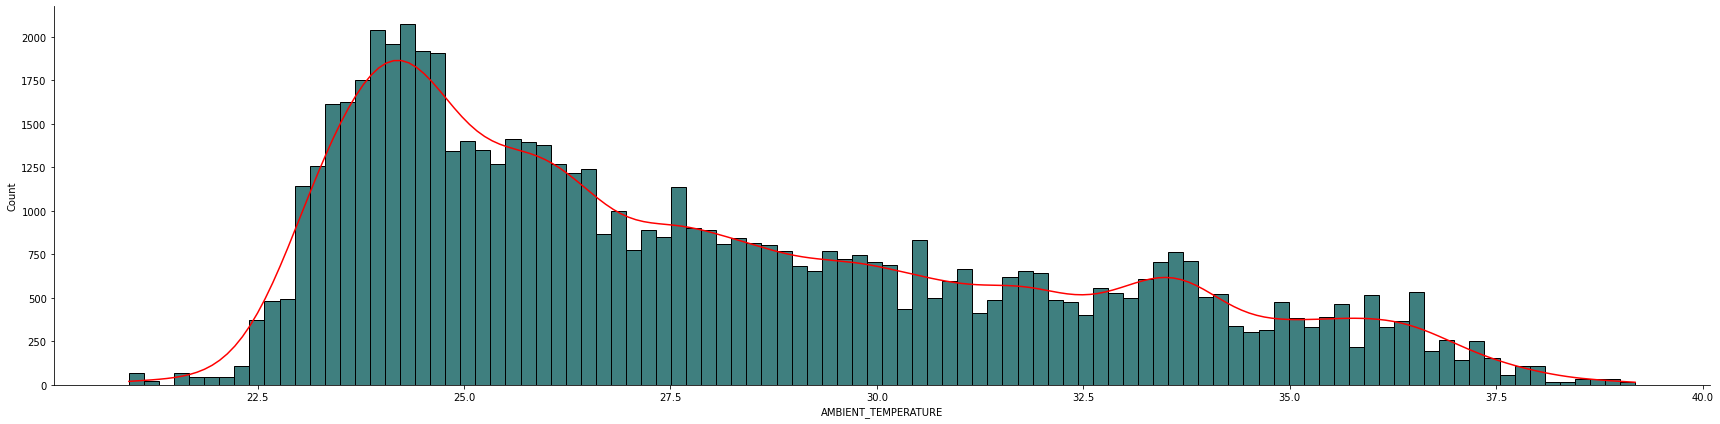

In [9]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins=100, color="red", facecolor='#3F7F7F', height=6, aspect=4)

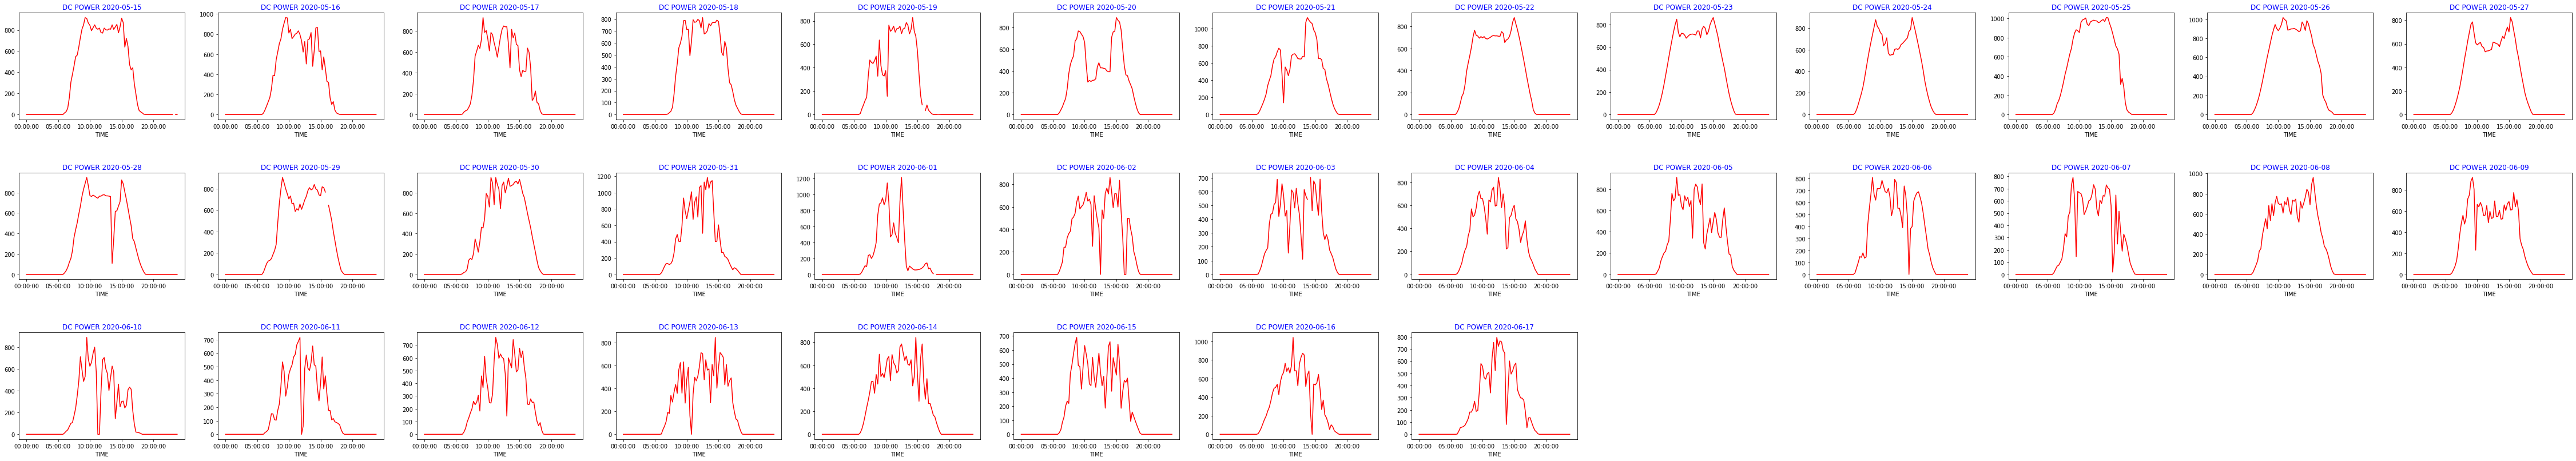

In [10]:
solar_dc=df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data=None, row=None, col=None, title='DC POWER'):
    cols=data.columns  #take all column
    gp=plt.figure(figsize=(80,60))
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax=gp.add_subplot(row, col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title,cols[i-1]), color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=13)

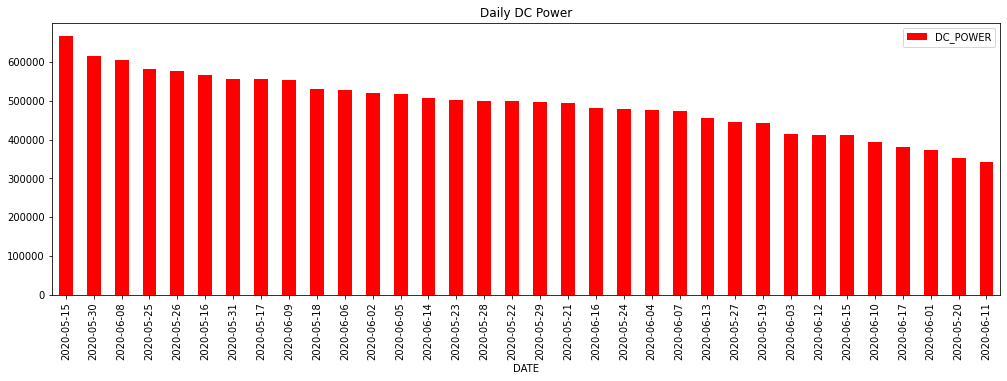

In [11]:
daily_dc=df_solar.groupby('DATE')['DC_POWER'].agg('sum')
ax=daily_dc.sort_values(ascending=False).plot.bar(figsize=(17, 5), legend=True, color='red')
plt.title('Daily DC Power')
plt.show()

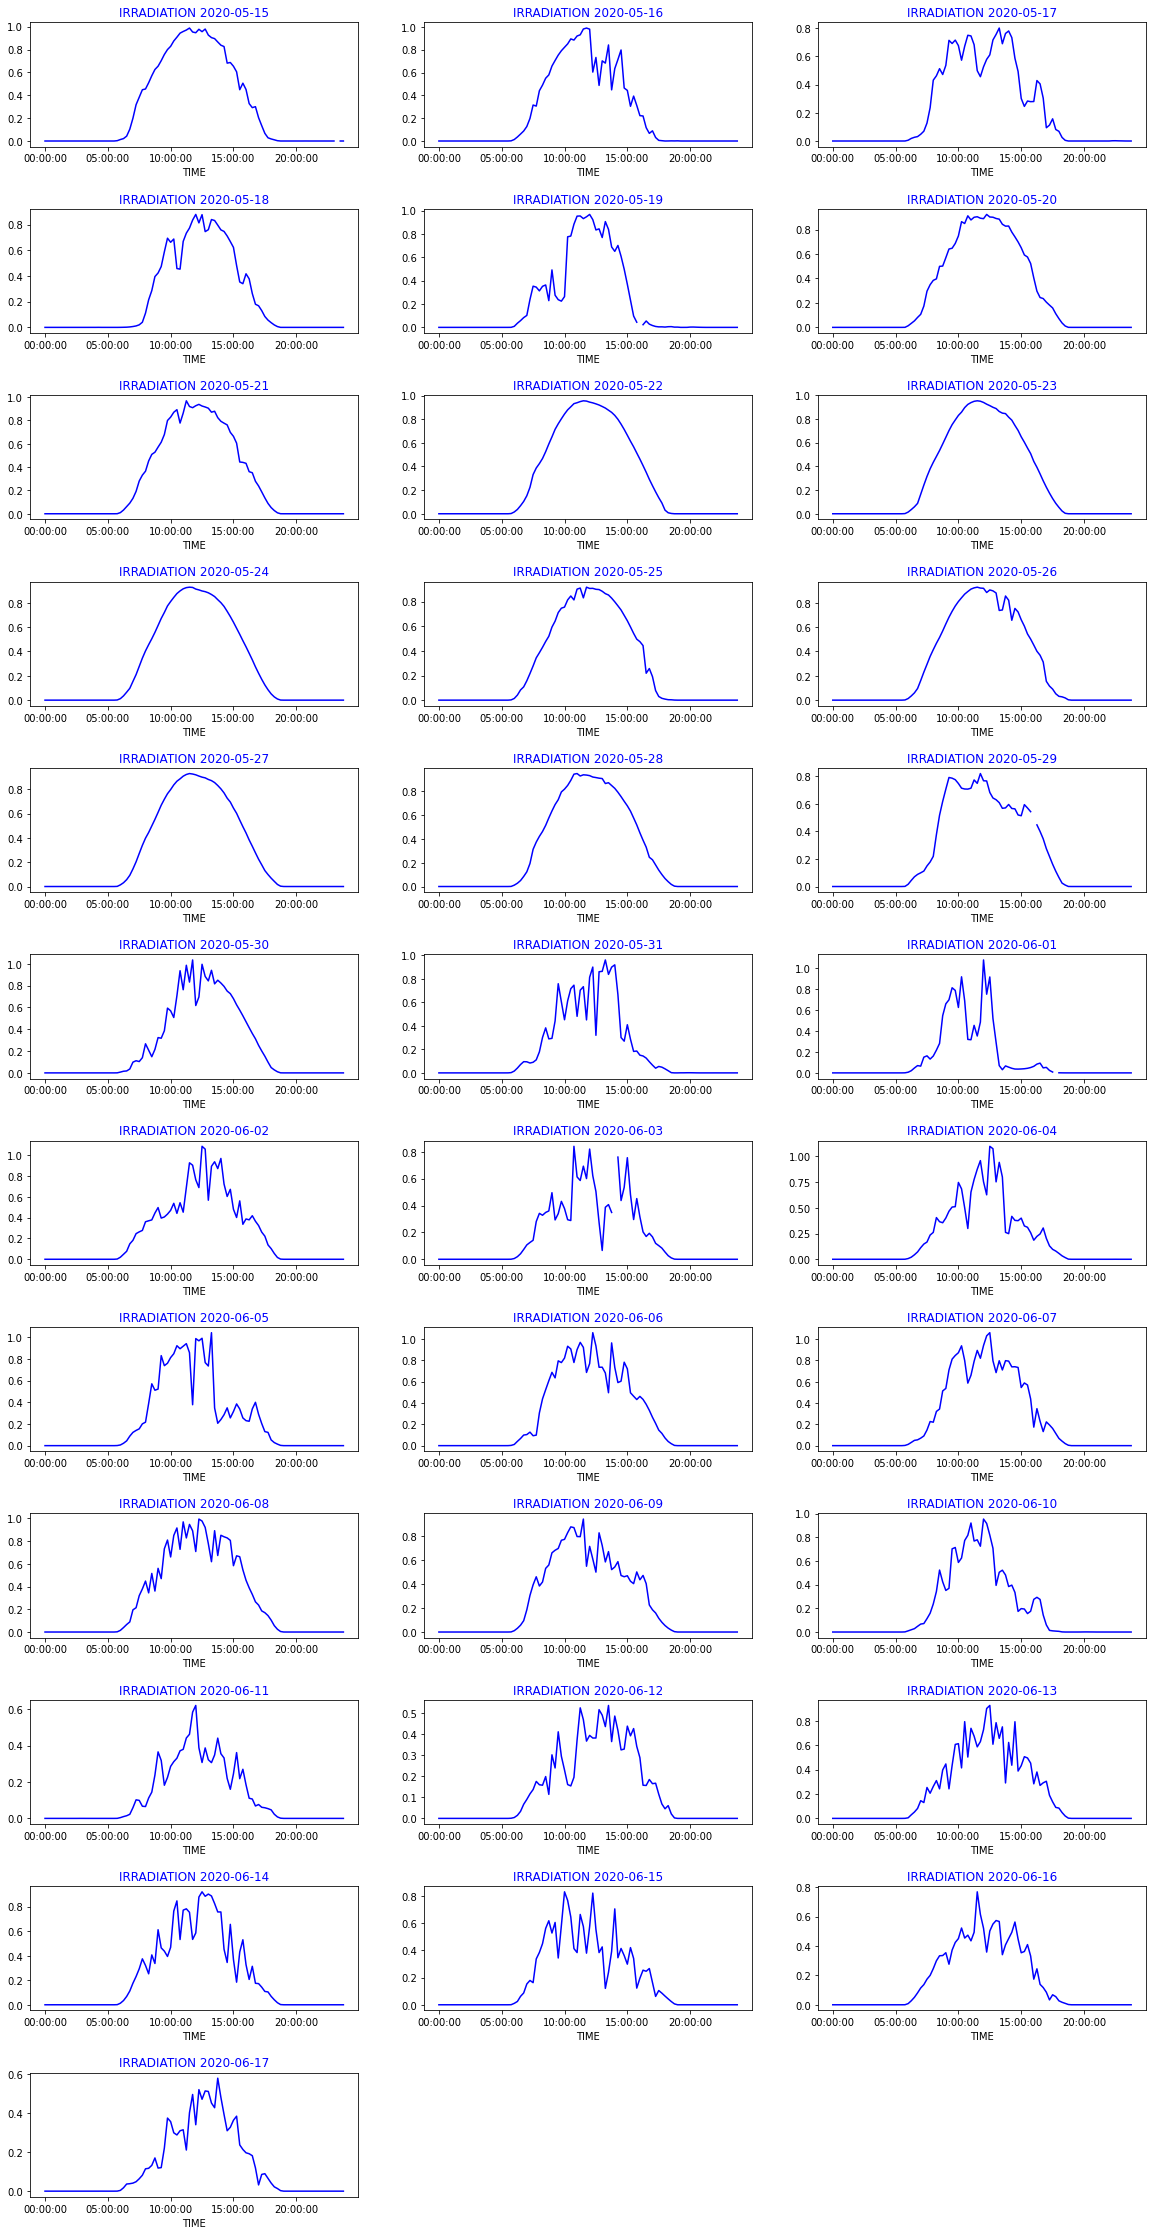

In [12]:
solar_irradiation=df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')
def Daywise_plot(data=None,row=None,col=None,title='IRRADIATION'):
    cols=data.columns
    gp=plt.figure(figsize=(20,40))
    gp.subplots_adjust(wspace=0.2,hspace=0.5)
    for i in range(1,len(cols)+1):
        ax=gp.add_subplot(row,col,i)
        data[cols[i-1]].plot(ax=ax,color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]), color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

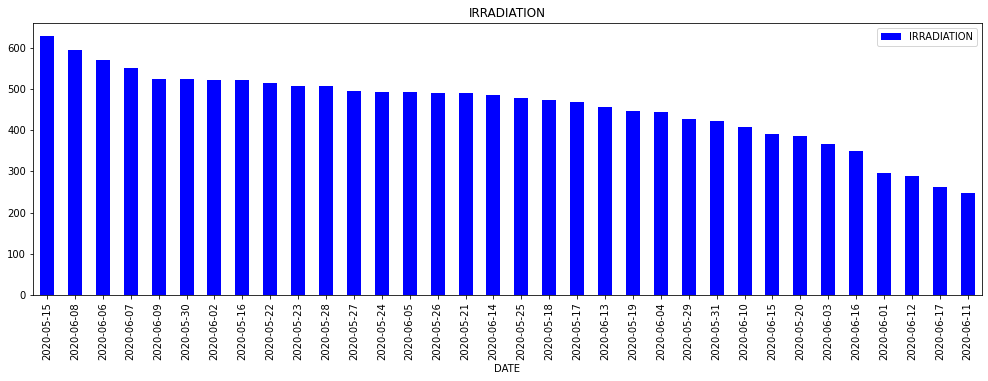

In [13]:
daily_dc=df_solar.groupby('DATE')['IRRADIATION'].agg('sum')
ax=daily_dc.sort_values(ascending=False).plot.bar(figsize=(17, 5), legend=True, color='blue')
plt.title('IRRADIATION')
plt.show()

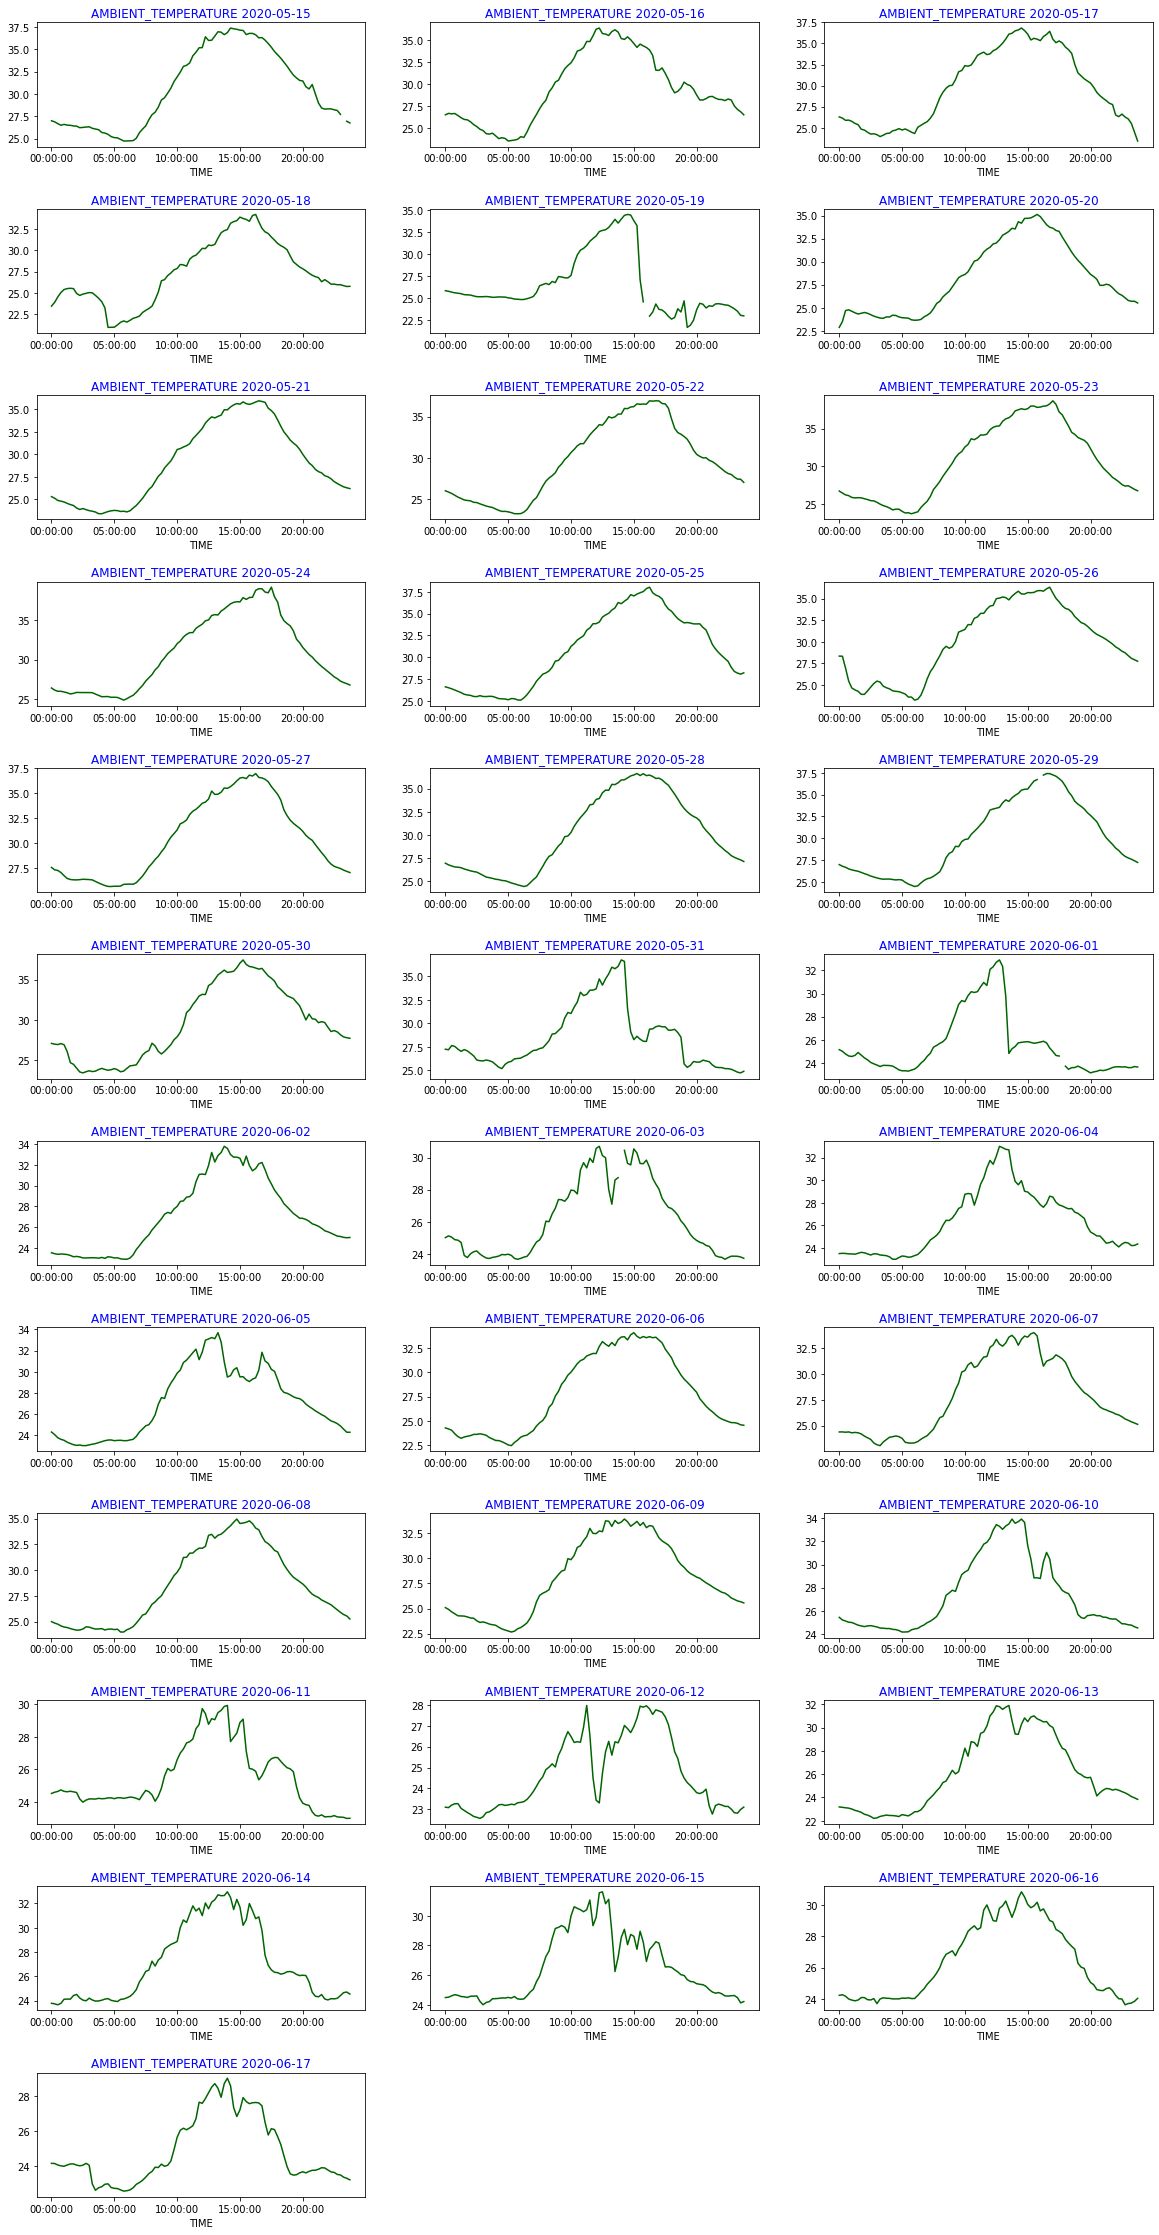

In [14]:
solar_ambient_temp=df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')
def Daywise_plot(data=None,row=None,col=None,title='AMBIENT_TEMPERATURE'):
    cols=data.columns
    gp=plt.figure(figsize=(20,40))
    gp.subplots_adjust(wspace=0.2,hspace=0.5)
    for i in range(1,len(cols)+1):
        ax=gp.add_subplot(row,col,i)
        data[cols[i-1]].plot(ax=ax,color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]), color='blue')

Daywise_plot(data=solar_ambient_temp, row=12, col=3)

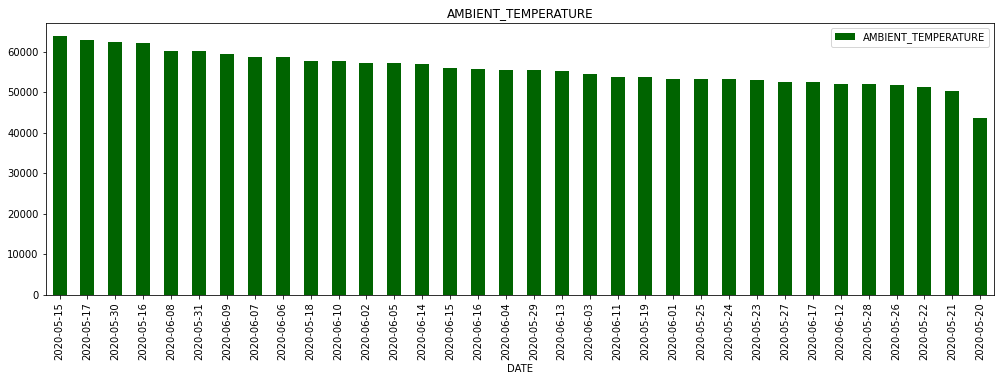

In [15]:
daily_dc=df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')
ax=daily_dc.sort_values(ascending=False).plot.bar(figsize=(17, 5), legend=True, color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'DC_POWER'),
  Text(1.5, 0, 'AC_POWER'),
  Text(2.5, 0, 'DAILY_YIELD'),
  Text(3.5, 0, 'TOTAL_YIELD'),
  Text(4.5, 0, 'AMBIENT_TEMPERATURE'),
  Text(5.5, 0, 'MODULE_TEMPERATURE'),
  Text(6.5, 0, 'IRRADIATION'),
  Text(7.5, 0, 'DAY'),
  Text(8.5, 0, 'MONTH'),
  Text(9.5, 0, 'WEEK'),
  Text(10.5, 0, 'MINUTES'),
  Text(11.5, 0, 'TOTAL MINUTES PASS')])

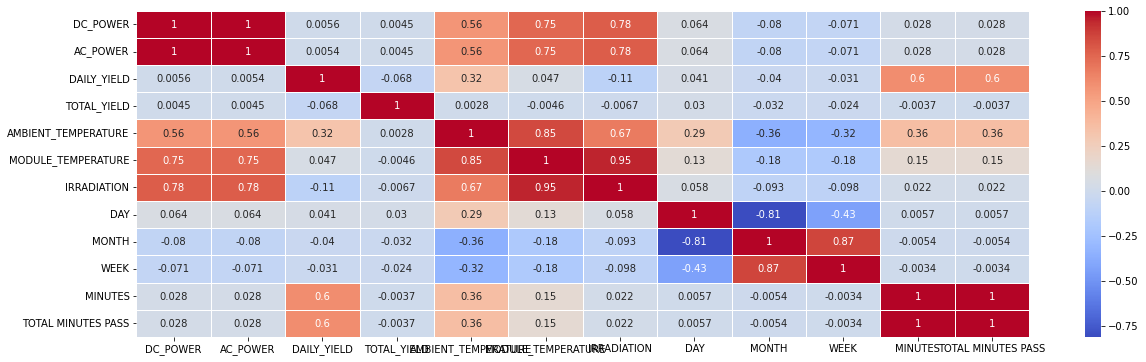

In [16]:
plt.figure(figsize=(20,6))
sns.heatmap(df_solar.corr(), annot=True, linewidth=1, fmt='0.2g', cmap='coolwarm')
plt.xticks(rotation='horizontal')

In [17]:
solar_dc_power=df_solar[df_solar['DC_POWER']>0]['DC_POWER'].values
solar_ac_power=df_solar[df_solar['AC_POWER']>0]['AC_POWER'].values

In [18]:
solar_plant_eff=(np.max(solar_ac_power)/np.max(solar_dc_power))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant: {solar_plant_eff:0.3f}%")

Power ratio AC/DC (Efficiency) of Solar Power Plant: 97.501%


In [19]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
len(AC_list)

32036

In [20]:
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
len(DC_list)

32036

Text(0.5, 1.0, 'Output Power vs Efficiency')

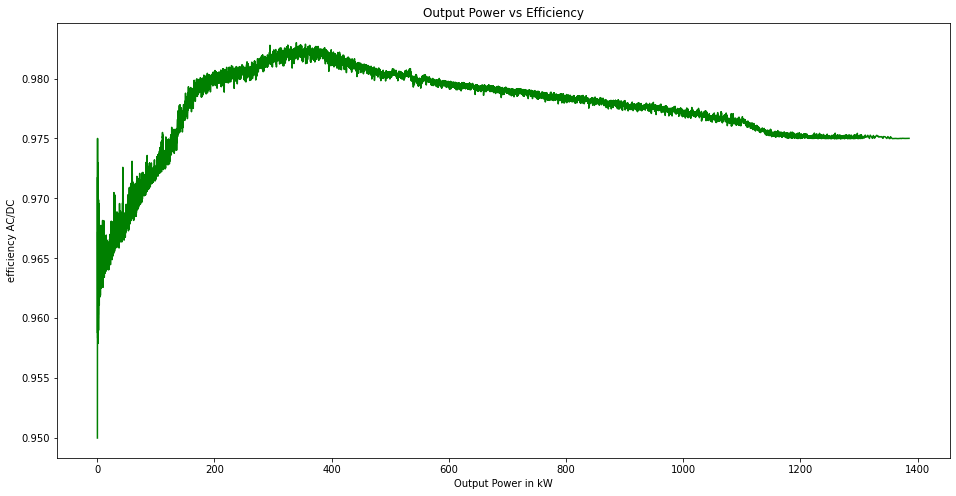

In [21]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
eff=[i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list, eff, color='green')
plt.xlabel('Output Power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output Power vs Efficiency')

In [22]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
y = df2[['DC_POWER', 'AC_POWER']]

In [23]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,9425.000000,2.429011e+06,27.004764,25.060789,0.0
1,0.000000,1.215279e+09,27.004764,25.060789,0.0
2,3075.333333,2.247720e+09,27.004764,25.060789,0.0
3,269.933333,1.704250e+06,27.004764,25.060789,0.0
4,3177.000000,1.994153e+07,27.004764,25.060789,0.0


In [24]:
y.head()

,DC_POWER,AC_POWER
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [25]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
x1 = sc1.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = r2_score(y_pred_lr,y_test)

print("R2 Score : ",R2_Score_lr)
mse_lr=mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error: ", mse_lr)

R2 Score :  0.38872681735250675
Mean Squared Error:  50499.68616561151


Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor

# Create a decision tree model with desired hyperparameters
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Wrap the decision tree model in MultiOutputRegressor to perform multi-target regression
multi_dt = MultiOutputRegressor(dt_model)

# Fit the multi-output decision tree model on training data
multi_dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = multi_dt.predict(X_test)

# Calculate mean squared error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse_dt)

r2_dt=r2_score(y_test, y_pred_dt)
print("R2 Score: ", r2_dt)

Mean Squared Error: 14705.58640866733
R2 Score:  0.889766056467955


Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor with desired hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Wrap the Random Forest Regressor in MultiOutputRegressor to perform multi-target regression
multi_rf = MultiOutputRegressor(rf_model)

# Fit the multi-output Random Forest Regressor on training data
multi_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = multi_rf.predict(X_test)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rf)

r2_rf=r2_score(y_test, y_pred_rf)
print("R2 Score: ", r2_rf)

Mean Squared Error: 12183.917994764126
R2 Score:  0.9086808830203922


Neural Networks(MLP Regressor)

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Train an MLPRegressor on the training set
nn = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='adam', max_iter=500, random_state=42, verbose=True)
nn.fit(X_train, y_train)

# Predict on the test set
y_pred_nn = nn.predict(X_test)

# Calculate mean squared error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Mean Squared Error:", mse_nn)

r2_nn=r2_score(y_test, y_pred_nn)
print("R2 Score: ", r2_nn)

Iteration 1, loss = 94346.16007961
Iteration 2, loss = 86414.27788320
Iteration 3, loss = 79383.04984789
Iteration 4, loss = 73270.24873889
Iteration 5, loss = 67936.90367036
Iteration 6, loss = 63165.72253556
Iteration 7, loss = 58866.23252748
Iteration 8, loss = 55012.41889334
Iteration 9, loss = 51562.06614314
Iteration 10, loss = 48467.56552920
Iteration 11, loss = 45683.44197930
Iteration 12, loss = 43164.29954111
Iteration 13, loss = 40863.06530045
Iteration 14, loss = 38752.62995081
Iteration 15, loss = 36828.28345270
Iteration 16, loss = 35084.91396719
Iteration 17, loss = 33509.94322347
Iteration 18, loss = 32095.36484872
Iteration 19, loss = 30825.95911416
Iteration 20, loss = 29684.26653882
Iteration 21, loss = 28639.34897610
Iteration 22, loss = 27635.27345623
Iteration 23, loss = 26668.81119626
Iteration 24, loss = 25749.51679927
Iteration 25, loss = 24942.06961889
Iteration 26, loss = 24210.42491998
Iteration 27, loss = 23458.84796808
Iteration 28, loss = 22643.18331548
I

Iteration 226, loss = 10087.69386447
Iteration 227, loss = 10079.78289720
Iteration 228, loss = 10082.80763451
Iteration 229, loss = 10081.78905010
Iteration 230, loss = 10079.49244061
Iteration 231, loss = 10079.27625469
Iteration 232, loss = 10076.88585319
Iteration 233, loss = 10070.67357338
Iteration 234, loss = 10075.82538504
Iteration 235, loss = 10071.80692009
Iteration 236, loss = 10069.88663512
Iteration 237, loss = 10066.66810635
Iteration 238, loss = 10070.00616293
Iteration 239, loss = 10063.39040382
Iteration 240, loss = 10060.79777078
Iteration 241, loss = 10058.46334392
Iteration 242, loss = 10057.77809321
Iteration 243, loss = 10054.24896143
Iteration 244, loss = 10060.35059747
Iteration 245, loss = 10052.84860823
Iteration 246, loss = 10052.22099184
Iteration 247, loss = 10050.60116647
Iteration 248, loss = 10047.23693240
Iteration 249, loss = 10044.40037055
Iteration 250, loss = 10045.49101520
Iteration 251, loss = 10040.73211745
Iteration 252, loss = 10042.47453792
I

Iteration 453, loss = 9711.34097942
Iteration 454, loss = 9702.82231027
Iteration 455, loss = 9704.46506370
Iteration 456, loss = 9702.65312941
Iteration 457, loss = 9706.20618881
Iteration 458, loss = 9700.57315402
Iteration 459, loss = 9697.34554196
Iteration 460, loss = 9694.22098337
Iteration 461, loss = 9696.57081820
Iteration 462, loss = 9694.83166676
Iteration 463, loss = 9689.60132415
Iteration 464, loss = 9689.89429266
Iteration 465, loss = 9693.56315209
Iteration 466, loss = 9688.57705792
Iteration 467, loss = 9688.90200770
Iteration 468, loss = 9685.45373175
Iteration 469, loss = 9685.42395809
Iteration 470, loss = 9681.47785814
Iteration 471, loss = 9682.30077544
Iteration 472, loss = 9678.85809498
Iteration 473, loss = 9679.96005234
Iteration 474, loss = 9676.87888436
Iteration 475, loss = 9677.12122856
Iteration 476, loss = 9671.03882944
Iteration 477, loss = 9672.63220206
Iteration 478, loss = 9672.36883869
Iteration 479, loss = 9674.96124805
Iteration 480, loss = 9669.1

Combination of Neural Networks and Random Forest Regressor

In [35]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Train a neural network on the training set
nn = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='adam', max_iter=500)
nn.fit(X_train, y_train)

# Train a random forest regressor on the training set
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(X_train, y_train)

# Use the trained models to make predictions on the validation set
nn_preds = nn.predict(X_train)
multi_rf_preds = multi_rf.predict(X_train)

# Combine the predictions into a new dataset
combined_preds = np.column_stack((nn_preds, multi_rf_preds))

# Train a second-level model on the combined dataset
lr = LinearRegression()
lr.fit(combined_preds, y_train)

# Use the trained models to make predictions on the test set
nn_preds_test = nn.predict(X_test)
multi_rf_preds_test = multi_rf.predict(X_test)
combined_preds_test = np.column_stack((nn_preds_test, multi_rf_preds_test))
y_pred_comb = lr.predict(combined_preds_test)

# Calculate mean squared error
mse_comb = mean_squared_error(y_test, y_pred_comb)
print("Mean Squared Error:", mse_comb)

r2_comb=r2_score(y_test, y_pred_comb)
print("R2 Score: ", r2_comb)

Mean Squared Error: 11896.489450275752
R2 Score:  0.9108308169963266


In [37]:
from tabulate import tabulate
data = [["Linear Regression", R2_Score_lr, mse_lr],
        ["Decision Tree", r2_dt, mse_dt], 
        ["Random Forest", r2_rf, mse_rf],
        ["Neural Networks", r2_nn, mse_nn],
        ["Combination of NN & Random Forest", r2_comb, mse_comb]]

col_names = ["Model", "R2 Score", "Mean Squared Error"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid", floatfmt=".16f"))

╒═══════════════════════════════════╤════════════════════╤════════════════════════╕
│ Model                             │           R2 Score │     Mean Squared Error │
╞═══════════════════════════════════╪════════════════════╪════════════════════════╡
│ Linear Regression                 │ 0.3887268173525067 │ 50499.6861656115070218 │
├───────────────────────────────────┼────────────────────┼────────────────────────┤
│ Decision Tree                     │ 0.8897660564679550 │ 14705.5864086673300335 │
├───────────────────────────────────┼────────────────────┼────────────────────────┤
│ Random Forest                     │ 0.9086808830203922 │ 12183.9179947641259787 │
├───────────────────────────────────┼────────────────────┼────────────────────────┤
│ Neural Networks                   │ 0.8586526664426419 │ 18857.7640952397014189 │
├───────────────────────────────────┼────────────────────┼────────────────────────┤
│ Combination of NN & Random Forest │ 0.9108308169963266 │ 11896.48945027575